# Data Scientist Associate 
## Proposal for Practical Exam

## Task 1

The dataset contains **1500 rows and 8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table :
1. owned : Without missing values, two values 0 and 1.             
2. make_model : Same as the description without missing values. 
3. review_month : Without missing values, but the month short format was not correct for some rows, so i identified a regular expression **^\d\d-** to replace and make them match.
4. web_browser : 100+ missing values, so I replace them with **unknown**. 
5. reviewer_age : 100+ missing values represented by the **- symbol**, I replace them by the average age.       
6. primary_use : Same as the description, without missing values.        
7. value_for_money : Same as the description without missing values.
8. overall_rating : Same as the description without missing values.

After the validation step, the dataset contains **1500 rows and 8 columns.**


In [55]:
df.shape

(1500, 8)

### Original Dataset

In [21]:
# Data Validation
# Check all variables in the data againt the criteria in the database

import pandas as pd
import numpy as np
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("data/electric_bike_ratings_2212.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


### Validate the categorical variables

In [2]:
cat = ["make_model","review_month","web_browser","reviewer_age","primary_use","value_for_money"]
for col in cat:
    print(df[col].value_counts())

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Chrome     698
IE         239
Firefox    233
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
-     105
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
23     43
16     43
48     42
46     41
21     41
22     40
33     39
26     39
36     39
24     39
25     38
27     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
32     30
38     28
49     26
Name: reviewer_age, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64
5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10  

### Validate the numerical variables

In [3]:
df.describe()

,owned,overall_rating
count,1500.000000,1500.000000
mean,0.593333,17.138907
std,0.491375,2.445566
min,0.000000,11.690000
25%,0.000000,15.320000
50%,1.000000,18.240000
75%,1.000000,18.840000
max,1.000000,22.760000


### Check the missing values in the columns

In [56]:
df.isna().sum()

owned              0
make_model         0
review_month       0
web_browser        0
reviewer_age       0
primary_use        0
value_for_money    0
overall_rating     0
dtype: int64

### Clean the web_browser column

In [39]:
df["web_browser"] = df["web_browser"].fillna("unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


### Clean age column

In [59]:
# get all the rows were reviewer_age are not - and compute their mean for
avg_age = np.mean(df.loc[df["reviewer_age"] !='-',"reviewer_age"].astype(int))
# missing values replacement
df.loc[df["reviewer_age"] == "-","reviewer_age"] = avg_age
# convert the reviewer_age to int
df["reviewer_age"] = df["reviewer_age"].astype(int)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int32  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int32  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 82.2+ KB


,owned,reviewer_age,value_for_money,overall_rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,32.556000,4.977333,17.138907
std,0.491375,9.876769,1.486257,2.445566
min,0.000000,16.000000,1.000000,11.690000
25%,0.000000,24.000000,4.000000,15.320000
50%,1.000000,32.000000,5.000000,18.240000
75%,1.000000,41.000000,6.000000,18.840000
max,1.000000,50.000000,10.000000,22.760000


### Clean value_for_money column

In [48]:
# get rid of the /10 string in the value_for_money rating
df["value_for_money"] = (df["value_for_money"].str.replace("/10","",regex=False).astype(int))
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int32  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int32  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 82.2+ KB


,owned,reviewer_age,value_for_money,overall_rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,32.556000,4.977333,17.138907
std,0.491375,9.876769,1.486257,2.445566
min,0.000000,16.000000,1.000000,11.690000
25%,0.000000,24.000000,4.000000,15.320000
50%,1.000000,32.000000,5.000000,18.240000
75%,1.000000,41.000000,6.000000,18.840000
max,1.000000,50.000000,10.000000,22.760000


### Clean review_month column

In [60]:
# detect the regExp for some review_month rows and get rid of dd- string to stay just
# with the month
df["review_month"] = (df["review_month"].str.replace("^\d\d-","", regex = True))

In [61]:
df["overall_rating"].describe()

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64

### Print the informations of the cleaned dataset

### Informations

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int32  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int32  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 82.2+ KB


### Final Categorical variables

In [62]:
cat = ["owned","make_model","review_month","web_browser","primary_use"]
for col in cat:
    print(df[col].value_counts())

1    890
0    610
Name: owned, dtype: int64
Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64
Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64
Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64
Commuting    1095
Leisure       405
Name: primary_use, dtype: int64


### Final Numerical variables

In [63]:
df.describe()

,owned,reviewer_age,value_for_money,overall_rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,32.556000,4.977333,17.138907
std,0.491375,9.876769,1.486257,2.445566
min,0.000000,16.000000,1.000000,11.690000
25%,0.000000,24.000000,4.000000,15.320000
50%,1.000000,32.000000,5.000000,18.240000
75%,1.000000,41.000000,6.000000,18.840000
max,1.000000,50.000000,10.000000,22.760000


## Task 2

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

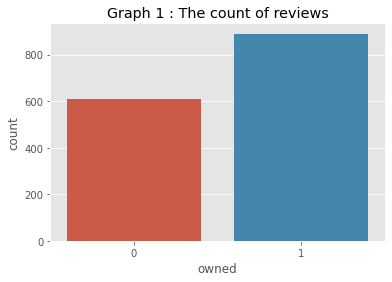

In [66]:
# Create a visualisation for reviews 
style.use('ggplot')
sns.countplot(x = df["owned"]).set(title="Graph 1 : The count of reviews")
plt.show()

As shown in **Graph 1 : The count of reviews** , the most number of reviews are from owners. The "owned" class is not significantly larger that the "non-owned" so, we can conclude that the observations are balanced accross the two cateories.

## Task 3

As shown **Graph 2 : The distribution of the overall rating** , the distribution is a bit closer to the normal distribution. Most of users have an over all rating score greater than 16.

[Text(0.5, 1.0, 'Graph 2 : The distribution of the overall rating')]

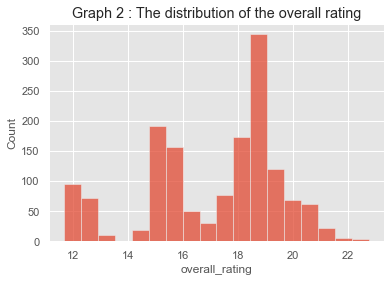

In [343]:
sns.histplot(x = df["overall_rating"]).set(title="Graph 2 : The distribution of the overall rating")

## Task 4 

In [344]:
df.loc[df["owned"]==1,"overall_rating"].describe()

count    890.000000
mean      18.102461
std        1.943137
min       11.790000
25%       17.177500
50%       18.590000
75%       19.217500
max       22.760000
Name: overall_rating, dtype: float64

In [345]:
df.loc[df["owned"]==0,"overall_rating"].describe()

count    610.000000
mean      15.733066
std        2.423420
min       11.690000
25%       14.705000
50%       15.490000
75%       18.300000
max       20.550000
Name: overall_rating, dtype: float64

From **Graph 3 : The Boxplot between Overall Ratings and Owned**, les owned ont globalement ont une médiane plus grande d'environ 3 points que celle des non_owned. Les overall rating des non sont plus dispersées que celles des owned. Over all rating of owned have largest range. Tout porte à croire que le fait d'être owned a une influence sur le overall_rating, cependant ceci pourrait être aisement vérifié à l'aide d'un test statistique.

[Text(0.5, 1.0, 'Graph 3 : The Boxplot between Overall Ratings and Owned')]

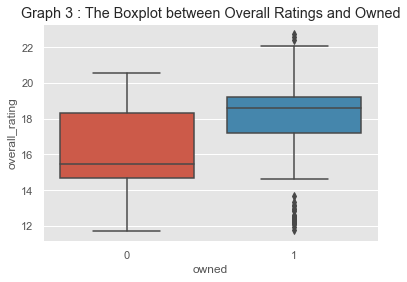

In [346]:
sns.boxplot(data=df, y = "overall_rating", x = "owned").set(title="Graph 3 : The Boxplot between Overall Ratings and Owned")

### Some verifications and changes to enable modeling

Finaly to enable a good model fitting, I have made the following verifications and changes :

1. Check autocorrelation between numerical variables.
2. Perform normality tests on numerical variables to check if we can perform parametric tests on them.
3. Perform some statiscal tests between **owned** and all the other features to get variables that can well explain the owned variable.
4. Drop those for which the tests are not significants to clean the dataset.
5. Convert all the categorical variables into numeric variables.

We take $alpha$ = 0.05 threshold.

### 1. Check autocorrelations between numerical variables

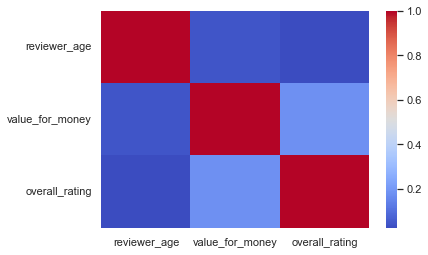

In [347]:
num_vars = ["reviewer_age","value_for_money","overall_rating"]
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(df[num_vars].corr(), xticklabels=num_vars,
                yticklabels=num_vars, cmap='coolwarm')

Numerical variables are not autocorrelated.

In [348]:
# import pingouin for tests
import pingouin as pg

### 2. Perform normality tests on numerical variables

In [349]:
pg.normality(df["reviewer_age"])

,W,pval,normal
reviewer_age,0.956402,9.327250e-21,False


In [350]:
pg.normality(df["value_for_money"])

,W,pval,normal
value_for_money,0.961231,1.424556e-19,False


In [351]:
pg.normality(df["overall_rating"])

,W,pval,normal
overall_rating,0.925689,1.314713e-26,False


Numerical variables are not normaly distributed. So parametric tests are indicated here.

### 3.a Kruskal-Wallis test between numerical variables and owned variable

In [352]:
# reviewer_age and owned
pg.kruskal(data = df, dv = "reviewer_age", between="owned")

,Source,ddof1,H,p-unc
Kruskal,owned,1,4.435815,0.035192


We can support a difference of reviewer_age between the ratings of the two groups (owned and non_owned).

In [353]:
# value_for_money and owned
pg.kruskal(data = df, dv = "value_for_money", between="owned")

,Source,ddof1,H,p-unc
Kruskal,owned,1,193.648263,5.081978e-44


We can support a difference of value_for_money between the ratings of the two groups (owned and non_owned).

In [354]:
# overall_rating and owned
pg.kruskal(data = df, dv = "overall_rating", between="owned")

,Source,ddof1,H,p-unc
Kruskal,owned,1,340.22521,5.699333e-76


We can support a difference of overall_rating between the ratings of the two groups (owned and non_owned).

### 3.b  Chi2 independence test on categorical variables

In [355]:
expected_mmodel, observed_mmodel, stats_mmodel = pg.chi2_independence(data = df, x="make_model", y = "owned")
print(stats_mmodel[stats_mmodel["test"] == "pearson"])

      test  lambda        chi2  dof          pval    cramer  power
0  pearson     1.0  312.621544  5.0  1.934650e-65  0.456524    1.0


 We can support that make_model and  **owned** are not independent.

In [356]:
expected_rmonth, observed_rmonth, stats_rmonth = pg.chi2_independence(data = df, x="review_month", y = "owned")
print(stats_rmonth[stats_rmonth["test"] == "pearson"])

      test  lambda      chi2   dof      pval    cramer     power
0  pearson     1.0  4.123823  11.0  0.966154  0.052433  0.211899


We can support that review_month and **owned** are independent.

In [357]:
expected_wbrowser, observed_wbrowser, stats_wbrowser = pg.chi2_independence(data = df, x="web_browser", y = "owned")
print(stats_wbrowser[stats_wbrowser["test"] == "pearson"])

      test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  10.65958  6.0  0.099485  0.084299  0.677103


We can support that web_browser and **owned** are independent.

In [358]:
expected_puse, observed_puse, stats_puse = pg.chi2_independence(data = df, x="primary_use", y = "owned")
print(stats_puse[stats_puse["test"] == "pearson"])

      test  lambda       chi2  dof     pval    cramer     power
0  pearson     1.0  11.627056  1.0  0.00065  0.088042  0.926454


We can support that primary_use and **owned** are not independent.

### 4. Select the set of variables to use for the model

Based on the previous statistical tests, the selected variables that we'll use to compute the model are : 
   1. reviewer_age.
   2. value_for_money
   3. overall_rating
   4. make_model
   5. primary_use

In [359]:
# drop others variables
df = df.drop(columns = ["review_month","web_browser"])

### 5. Convert categorical variables to numerical

In [360]:
from sklearn import preprocessing
features = df.drop(columns="owned")
X = pd.get_dummies(features, columns=["make_model","primary_use"])
y = df["owned"]

## Task 5

Predicting the wether a review came from an owner or not is a **classification** problem in Machine Learning.

In [361]:
# import ML models and performance metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

SEED = 1

In [362]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state = SEED)

## Task 6

**Baseline model** - Decision tree classifier model

In [363]:
dt_cls = DecisionTreeClassifier(random_state=SEED)
dt_cls.fit(X_train, y_train)
y_pred_dt_cls = dt_cls.predict(X_test)

## Task 7

**Comparison Model** - Random Forest Model for Classification tasks

In [364]:
# Create a RandomForestClassifier model for comparison
rf = RandomForestClassifier(n_estimators = 500, random_state=SEED)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.7466666666666667


In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Instanciate individual classifiers
lr = LogisticRegression(random_state=SEED,solver="liblinear")
knn = KNN()
dt = DecisionTreeClassifier(random_state=1)

classifiers = [('Logistic Regression',lr),
                ('K Nearest Neighbors', knn),
               ('Classification Tree', dt)]

# Create Voting classifier based on classifiers
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)

## Task 8

I am choosing the **Decision Tree Classification Model** as a baseline model because it's simple and efficient to train and interpret, it's also able to capture non-linear relationships between features and labels. The comparison model I'm choosing is the **Voting Classifier Model** composed of : Logistic Regression, KNN and Decision Tree, because it can capture more complex relationship between input features and target variables and return us the best prediction based on different classifiers. 

## Task 9

I'm chosing **accuracy score** to evaluate the model because it's commonly used and easy to interpret because it give us the percent of correct predictions made.

### Evaluating Logistic Regression Model

In [366]:
print(accuracy_score(y_test, y_pred_dt_cls))

0.7022222222222222


### Evaluating Voting Model Classifier

In [367]:
print(accuracy_score(y_test, y_pred_vc))

0.7511111111111111


## Task 10

A greater accuracy value indicates the model has smaller errors in prediction.

Thereforre, **Voting Classifier Model** is performing better at predicting whether a review came from an owner or not based on this metric.